# Swapnil Sharma 2010992466

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from category_encoders import *

In [203]:
vaccine=pd.read_csv('vaccine.csv')

In [204]:
vaccine.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [205]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [206]:
vaccine.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [207]:
vaccine.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

In [208]:
vaccine.shape

(26707, 34)

In [209]:
vaccine['h1n1_worry'].fillna(vaccine['h1n1_worry'].mode()[0], inplace = True)

In [210]:
vaccine['h1n1_awareness'].fillna(vaccine['h1n1_awareness'].mode()[0], inplace = True)

In [211]:
vaccine['antiviral_medication'].fillna(vaccine['antiviral_medication'].mode()[0], inplace = True)

In [212]:
vaccine['contact_avoidance'].fillna(vaccine['contact_avoidance'].mode()[0], inplace = True)

In [213]:
vaccine['bought_face_mask'].fillna(vaccine['bought_face_mask'].mode()[0], inplace = True)

In [214]:
vaccine['wash_hands_frequently'].fillna(vaccine['wash_hands_frequently'].mode()[0], inplace = True)

In [215]:
vaccine['avoid_large_gatherings'].fillna(vaccine['avoid_large_gatherings'].mode()[0], inplace = True)

In [216]:
vaccine['reduced_outside_home_cont'].fillna(vaccine['reduced_outside_home_cont'].mode()[0], inplace = True)

In [217]:
vaccine['avoid_touch_face'].fillna(vaccine['avoid_touch_face'].mode()[0], inplace = True)

In [218]:
vaccine['dr_recc_h1n1_vacc'].fillna(vaccine['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
vaccine['dr_recc_seasonal_vacc'].fillna(vaccine['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [219]:
vaccine['chronic_medic_condition'].fillna(vaccine['chronic_medic_condition'].mode()[0], inplace = True)

In [220]:
vaccine['cont_child_undr_6_mnths'].fillna(vaccine['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [221]:
vaccine['is_health_worker'].fillna(vaccine['is_health_worker'].mode()[0], inplace = True)

In [222]:
vaccine['has_health_insur'].fillna(vaccine['has_health_insur'].mode()[0], inplace = True)

In [223]:
vaccine['is_h1n1_vacc_effective'].fillna(vaccine['is_h1n1_vacc_effective'].mode()[0], inplace = True)
vaccine['is_seas_vacc_effective'].fillna(vaccine['is_seas_vacc_effective'].mode()[0], inplace = True)

In [224]:
vaccine['is_h1n1_risky'].fillna(vaccine['is_h1n1_risky'].mode()[0], inplace = True)
vaccine['is_seas_risky'].fillna(vaccine['is_seas_risky'].mode()[0], inplace = True)

In [225]:
vaccine['sick_from_h1n1_vacc'].fillna(vaccine['sick_from_h1n1_vacc'].mode()[0], inplace = True)
vaccine['sick_from_seas_vacc'].fillna(vaccine['sick_from_seas_vacc'].mode()[0], inplace = True)

In [226]:
vaccine['qualification'].fillna(vaccine['qualification'].mode()[0], inplace = True)

In [227]:
vaccine['income_level'].fillna('Unknown', inplace = True)

In [228]:
vaccine['marital_status'].fillna(vaccine['marital_status'].mode()[0], inplace = True)

In [229]:
vaccine['housing_status'].fillna(vaccine['housing_status'].mode()[0], inplace = True)

In [230]:
vaccine['employment'].fillna(vaccine['employment'].mode()[0], inplace = True)

In [231]:
vaccine['no_of_adults'].fillna(vaccine['no_of_adults'].mode()[0], inplace = True)
vaccine['no_of_children'].fillna(vaccine['no_of_children'].mode()[0], inplace = True)

In [232]:
vaccine.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [233]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26707 non-null  float64
 2   h1n1_awareness             26707 non-null  float64
 3   antiviral_medication       26707 non-null  float64
 4   contact_avoidance          26707 non-null  float64
 5   bought_face_mask           26707 non-null  float64
 6   wash_hands_frequently      26707 non-null  float64
 7   avoid_large_gatherings     26707 non-null  float64
 8   reduced_outside_home_cont  26707 non-null  float64
 9   avoid_touch_face           26707 non-null  float64
 10  dr_recc_h1n1_vacc          26707 non-null  float64
 11  dr_recc_seasonal_vacc      26707 non-null  float64
 12  chronic_medic_condition    26707 non-null  float64
 13  cont_child_undr_6_mnths    26707 non-null  flo

In [234]:
vaccine.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [235]:
vaccine.drop(['unique_id'], inplace = True, axis = 1)

In [236]:
str_columns = vaccine.columns.tolist()
vaccine1 = vaccine[str_columns].astype(str)

In [237]:
vaccine1.dtypes.value_counts()

object    33
dtype: int64

In [238]:
vaccine_dummy = pd.get_dummies(vaccine1, drop_first= True )
vaccine_dummy.head()

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,employment_Unemployed,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,h1n1_vaccine_1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [239]:
vaccine_dummy.shape

(26707, 69)

In [240]:
vaccine1.shape

(26707, 33)

In [241]:
Y=vaccine_dummy['h1n1_vaccine_1']
X=vaccine_dummy.drop(['h1n1_vaccine_1'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 101)

In [242]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [243]:
lr = LogisticRegression(random_state = 101)
lr.fit(X_train, y_train)

LogisticRegression(random_state=101)

In [244]:
y_pred = lr.predict(X_test)

In [245]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [246]:
metrics.accuracy_score(y_test, y_pred)

0.8337545633249087

Text(50.722222222222214, 0.5, 'Actual')

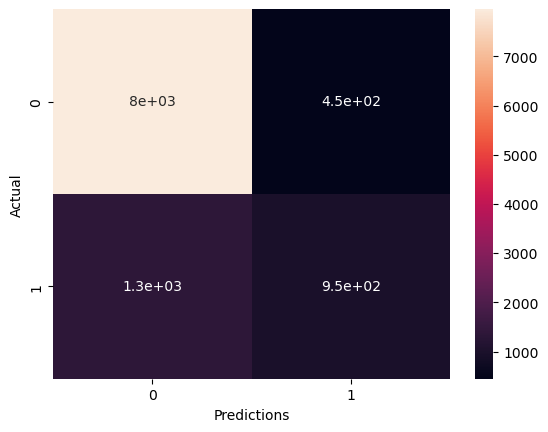

In [247]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [248]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8406
           1       0.68      0.42      0.52      2277

    accuracy                           0.83     10683
   macro avg       0.77      0.68      0.71     10683
weighted avg       0.82      0.83      0.82     10683



In [249]:
threshold=0.5
prediction_prob=lr.predict_proba(X_test)[:,1]
predictions=np.where(prediction_prob>threshold,1,0)
pd.DataFrame(data=[metrics.accuracy_score(y_test,y_pred),
                   metrics.recall_score(y_test,y_pred),
                   metrics.precision_score(y_test,y_pred),
                   metrics.roc_auc_score(y_test,prediction_prob),
                   metrics.f1_score(y_test, y_pred)],index=["accuracy","recall","precision","roc_auc_score","f1 score"])

,0
accuracy,0.833755
recall,0.416337
precision,0.679570
roc_auc_score,0.828937
f1 score,0.516340


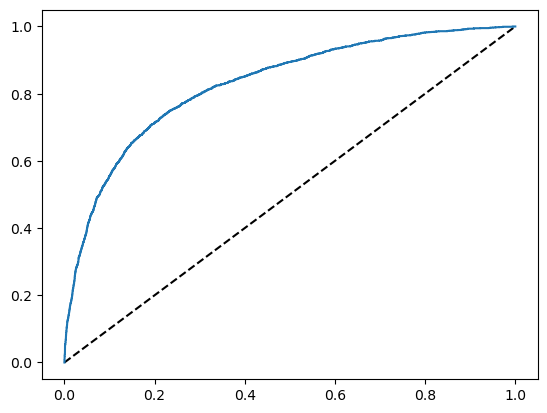

In [250]:
fpr, tpr, threshold=metrics.roc_curve(y_test,prediction_prob )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')

In [251]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [252]:
logreg=LogisticRegression()
rfe = RFE(logreg,n_features_to_select=None, step=1, verbose=0,importance_getter='auto')
rfe = rfe.fit(X,Y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True False  True False False  True False  True False False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False  True  True  True  True  True
  True  True False  True False  True False False  True  True  True False
 False  True  True  True False False False False False False False False
 False False False False False False False False]
[20  8  1 32  1  2 29  1 30  1 27 23  1  1 11  1  1  1  1  1  1  1  1  1
  1  1  1  1 13 12 16  1  1  1  1  1  1  1  6  1  5  1 19 33  1  1  1  9
 31  1  1  1  4 17 24  3  7 25 22 35 15 14 28 34 18 21 26 10]


In [267]:
sf=X.columns[rfe.support_]
newX = X[sf]
newX.shape

(26707, 34)

Text(50.722222222222214, 0.5, 'Actual')

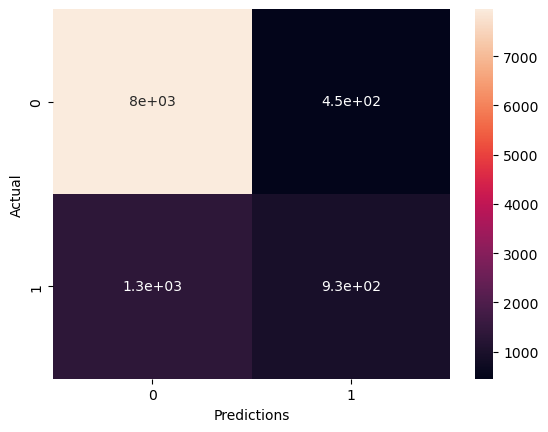

In [254]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(newX,Y, test_size = 0.4, random_state = 101)
logr=LogisticRegression()
logreg_with_rfe = logr.fit(X_train2, y_train2)
y_pred2 = logreg_with_rfe.predict(X_test2)
cfm=metrics.confusion_matrix(y_test2,y_pred2)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [255]:
print(metrics.classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8406
           1       0.67      0.41      0.51      2277

    accuracy                           0.83     10683
   macro avg       0.77      0.68      0.70     10683
weighted avg       0.82      0.83      0.82     10683



In [257]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [262]:
min_feature_to_select=1;
clf=LogisticRegression()
cv=StratifiedKFold(5)
rfecv=RFECV(
estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_feature_to_select,
    n_jobs=24
)
rfecv.fit(X,Y)
print(rfecv.n_features_)

48


In [266]:
sf2=X.columns[rfecv.support_]
newX2 = X[sf2]
newX2.shape

(26707, 48)

Text(50.722222222222214, 0.5, 'Actual')

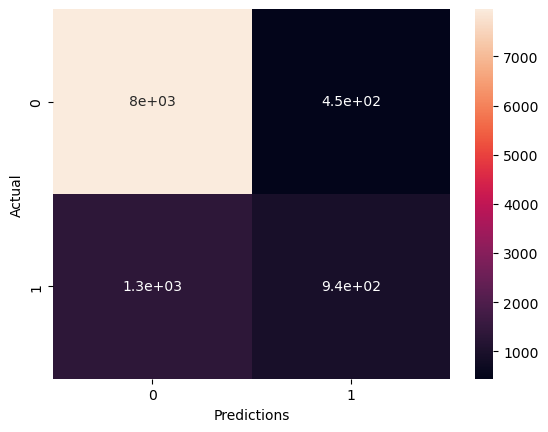

In [264]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(newX2,Y, test_size = 0.4, random_state = 101)
logr=LogisticRegression()
logreg_with_rfecv = logr.fit(X_train3, y_train3)
y_pred3 = logreg_with_rfecv.predict(X_test3)
cfm2=metrics.confusion_matrix(y_test3,y_pred3)
sns.heatmap(cfm2, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [265]:
print(metrics.classification_report(y_test3,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8406
           1       0.68      0.41      0.51      2277

    accuracy                           0.83     10683
   macro avg       0.77      0.68      0.71     10683
weighted avg       0.82      0.83      0.82     10683



In [269]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression

In [277]:
newX3 = SelectKBest(chi2, k=30).fit_transform(X, Y)
newX3.shape

(26707, 30)

In [271]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(newX3, Y, test_size = 0.4, random_state = 101)

In [272]:
clfk = LogisticRegression()
Kbest = clfk.fit(X_train4, y_train4)

In [274]:
y_pred4 = Kbest.predict(X_test4)

Text(50.722222222222214, 0.5, 'Actual')

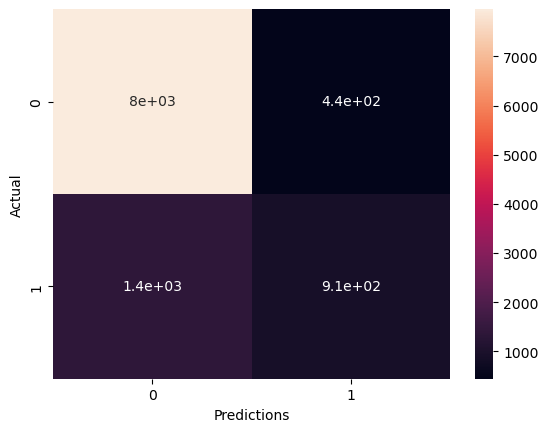

In [275]:
cfm3=metrics.confusion_matrix(y_test4,y_pred4)
sns.heatmap(cfm3, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [276]:
print(metrics.classification_report(y_test4,y_pred4))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      8406
           1       0.67      0.40      0.50      2277

    accuracy                           0.83     10683
   macro avg       0.76      0.67      0.70     10683
weighted avg       0.81      0.83      0.81     10683



In [280]:
from sklearn.feature_selection import VarianceThreshold

In [283]:
var=VarianceThreshold(0.2)
X_trans=var.fit_transform(X)
X_trans.shape

(26707, 22)

In [294]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_trans, Y, test_size = 0.4, random_state = 103)

In [295]:
clfvar = LogisticRegression()
variance_model = clfvar.fit(X_train5, y_train5)

In [296]:
y_pred5 = variance_model.predict(X_test5)

Text(50.722222222222214, 0.5, 'Actual')

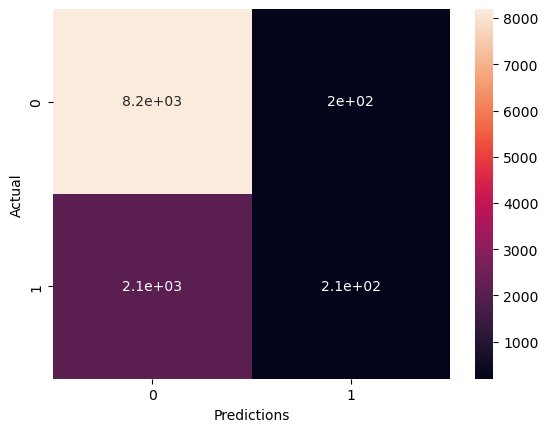

In [297]:
cfm4=metrics.confusion_matrix(y_test5,y_pred5)
sns.heatmap(cfm4, annot=True)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [298]:
print(metrics.classification_report(y_test5,y_pred5))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      8393
           1       0.52      0.09      0.16      2290

    accuracy                           0.79     10683
   macro avg       0.66      0.53      0.52     10683
weighted avg       0.74      0.79      0.72     10683

